In [6]:
import pandas as pd

# import the insurance.csv data
df = pd.read_csv('insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Target : Predict the insurance based on the given information
# Dataset : insurance.csv
# Date : 2021-03-03 10:00:00
# Author :  Ahmed Radwan

# problem definition and data exploration
# some features are not numeric, so we need to convert them to numeric
# determine x and y variables for regression
# split data into training and test sets
# create a regression model
# fit the model with training data
# predict the output for test data
# evaluate the results
# visualize the results

In [9]:
# covert the sex column to a categorical variable
df['sex'] = df['sex'].astype('category') 
df['sex'] = df['sex'].cat.codes 

# convert the smoker column to a categorical variable
df['smoker'] = df['smoker'].astype('category')
df['smoker'] = df['smoker'].cat.codes

# convert the region column to a categorical variable
df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes
df


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [10]:
x = df.drop(['charges'], axis=1)    # set the features as x
y = df['charges']                   # set the charges column as the target (y)
x,y

(      age  sex     bmi  children  smoker  region
 0      19    0  27.900         0       1       3
 1      18    1  33.770         1       0       2
 2      28    1  33.000         3       0       2
 3      33    1  22.705         0       0       1
 4      32    1  28.880         0       0       1
 ...   ...  ...     ...       ...     ...     ...
 1333   50    1  30.970         3       0       1
 1334   18    0  31.920         0       0       0
 1335   18    0  36.850         0       0       2
 1336   21    0  25.800         0       0       3
 1337   61    0  29.070         0       1       1
 
 [1338 rows x 6 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=0)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_train = lr.predict(x_train)
y_pred = lr.predict(x_test)
y_pred

array([11051.54909755,  9821.28110689, 37867.57220923, 16125.70579228,
        6920.27132517,  3879.38549816,  1448.91928088, 14390.17797974,
        9022.95151353,  7458.83371884,  4584.60125463, 10309.9886336 ,
        8693.03891958,  4085.25393494, 27551.60737718, 11151.0640722 ,
       11243.0536825 ,  5962.9521121 ,  8181.9015666 , 26750.7993431 ,
       33448.59842228, 14350.03320383, 11672.89478465, 32235.7832204 ,
        4326.07702625,  9096.53607025,  1045.25196369, 10177.76672094,
        4042.60346751, 10384.28681219,  9035.98983755, 40123.71002379,
       15507.20819083, 13678.264976  , 24481.97362849,  5059.21988589,
       12889.80609711, 30333.92625689, 33301.25091403,  3431.35787088,
        3941.81614597,  4203.90901434, 30219.19050725, 39245.56885373,
       27762.83744249,  4994.74188765, 11042.48621304,  7760.15047885,
        3569.09734756, 10613.61535955,  5544.95921408,  3397.80923785,
       32701.67144343, 38285.57836702, 16290.50463759,  6965.99677468,
      

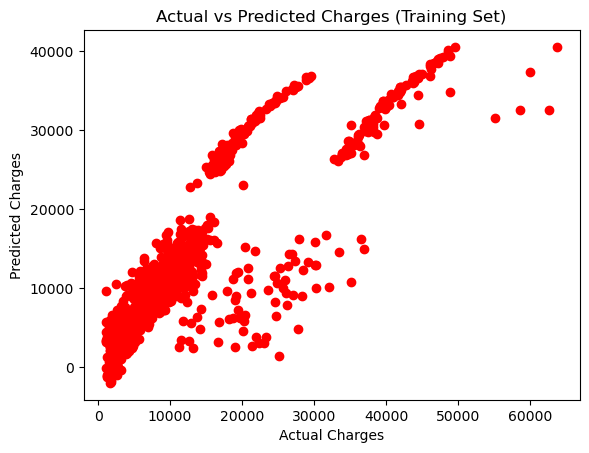

In [24]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train, color='red')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges (Training Set)')
plt.show()

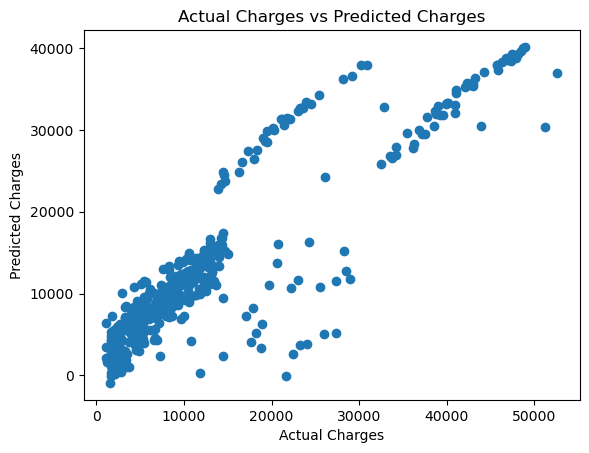

In [17]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual Charges vs Predicted Charges')
plt.show()

In [18]:
from sklearn.metrics import  mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred) 
r_squared = r2_score(y_test,y_pred) 
print('Mean Squared Error:',mse)
print('R Squared:',r_squared)


Mean Squared Error: 33311355.281859964
R Squared: 0.7911113876316933


*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************